<a href="https://colab.research.google.com/github/RiverCityData/st1800-231/blob/main/st1800_231_trabajo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

![eafit_logo](https://www.eafit.edu.co/institucional/sostenibilidad-ambiental/PublishingImages/ecologia-urbana/logos/eafit-logo.png)

<h1>Despliegue de Lakehouse usando servicios AWS</h1>
<h3><b>ST1800-231 Trabajo 1</b></h3>
<h3>Presentado Por:</h3>
<ul type=none>
<li> Juan Diego Atehortúa Cataño <i>ID 1000191897 </i> </li>
<li> Camila Díaz Zuluaga <i>ID 1000056958 </i></li>
<li> David Santiago Osorio Aristizabal <i>ID 1000220170 </i>  </li>
<li> Juan Camilo Osorio González <i>ID 1000121687 </i> </li>
</ul>

</center>

<br>

---



## **Contexto del trabajo**

<div align="justify">

<p>A continuación daremos cuenta de la implementación de los servicios de <strong>AWS</strong> para recolectar, almacenar y transformar datos relacionados con el fenómeno de cambio climático en un contexto global. Específicamente, estaremos trabajando con datos que dan cuenta de la cantidad de gases de efecto invernadero recolectados en <i>India</i> y <i>Estados Unidos</i>. Tales datos fueron extraídos de fuentes diferentes, lo cuál implica que se procesaran para conformar una base de datos consistente desde la cuál se podrán hacer diferentes consultas y posteriores transformaciones. 
</p>
</div>

<br>

---



  

## **Data Source**

<div align="justify">

<p>La implementación del datalake tomará datos relacionados con índices de gases de efecto invernadero en India y Estados Unidos. La fuente de los datos es la siguiente: 

<ul type= "circle">
  <li> <a href = "https://java.epa.gov/castnet/clearsession.do" style="text-decoration:none;"><strong>USA</strong></a>
  <li> <a href = "https://www.kaggle.com/datasets/shrutibhargava94/india-air-quality-data"><strong>India</strong></a>
</ul>
</p>
</div>

<br>

---

## **Ingesta**

<div align="justify">

<p>Dado que el set de datos no es de un gran tamaño, las técnicas de ingesta para formato <i>Big Data</i> que proporciona <strong>AWS</strong> no fueron tomados en cosideración. La ingesta, en este sentido, fue directamente almacenar los data sets en S3. No obstante, antes de almacenarlos en S3, se realizó un proceso de limpieza. 

</p>



#### **Limpieza**
<p>
Se remplazaron algunos caracteres especiales de algunas tablas a modo de preprocesamiento de los datos antes de ingresarlos al datalake. Esto se hizo al eliminar comillas dobles en algunas de las tablas, <i>e.g. s3://pollutants-datalake/Pollutants_Data/Raw/USA/sites/</i> y cambiar los separadores (comas por guiones) en las columnas de algunas archivos originales en formato <i>CSV</i>, pues al dejar los separadores originales se creaban, luego de emplear <strong>Glue Crawlers</strong>, columnas innecesarias. 
</p>
</div>

<br>

---

## **Almacenamiento**

### **AWS S3**

<div align="justify">



<p>El tipo de almacenamiento elegido para este ejercicio es el datalake <strong>AWS S3</strong>. La estructura de los directorios se elaboró manualmente antes de subir los data sets a la primera de las zonas, con el fin de tener un mejor manejo con el catalogador <strong>AWS Glue</strong>. Se implementaron los demás servicios, tanto de ETL, e.g. <i>EMR (Spark)</i>, como de consulta, e.g. <i>Athena</i> y <i>Redshift</i>, para almacenar en las otras zonas los objetos producto del refinamiento. 

 </p>

<p>
Las zonas creadas para este ejemplo de despliegue de un datalake fueron principalmente tres:
</p>
<ul>
  <li> <strong>Zona Raw:</strong> A esta zona se hizo la ingesta directamente.*
    <ul>URI: <i>s3://pollutants-datalake/Pollutants_Data/Raw/</i></ul>
  <li><strong>Zona Trusted:</strong> En esta zona se almacenaron los sets de datos producto de algun proceso de transformación mediante la implementación de <i>EMR</i>
    <ul>URI: <i>s3://pollutants-datalake/Pollutants_Data/Trusted/</i></ul>
  <li><strong>Zona Refined: </strong> En esta zona se almacenaron los resultados de los queries hechos a través de las herramientas de consulta <i>Athena</i> y <i>Redshift</i>.
    <ul>URI: <i>s3://pollutants-datalake/Pollutants_Data/Refined/</i></ul>
    <font size="2"> *Los URIs enlistados pueden diferir en algunos de los pantallazos de ejemplo, pues se trabajaron por todos los miembros del equipo.</font>
</ul>
</div>


<br>


<ul>

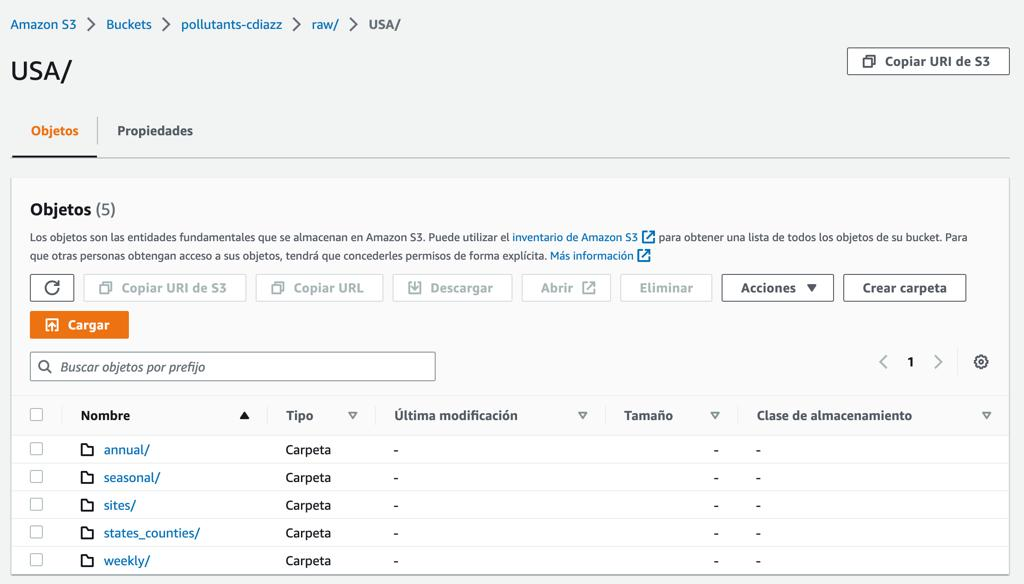

</ul>

<ul>

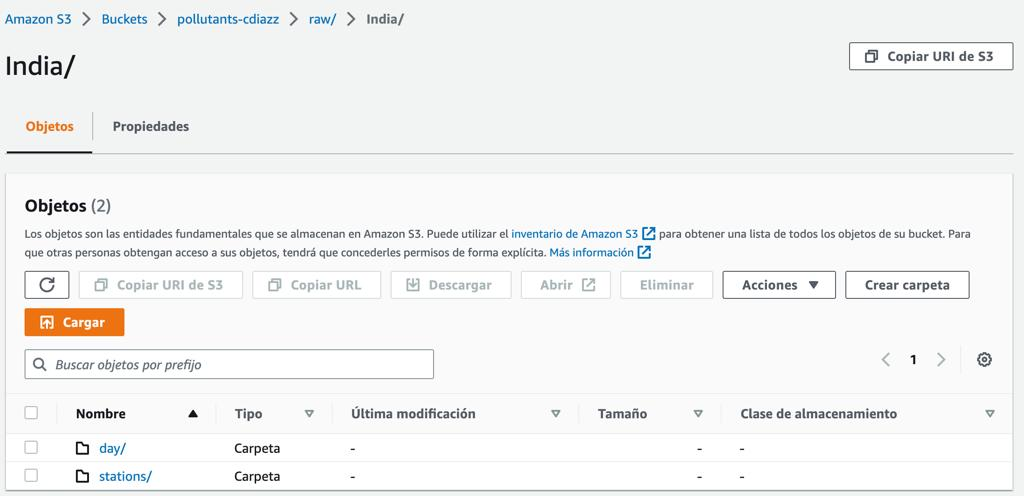
</ul>

<ul>

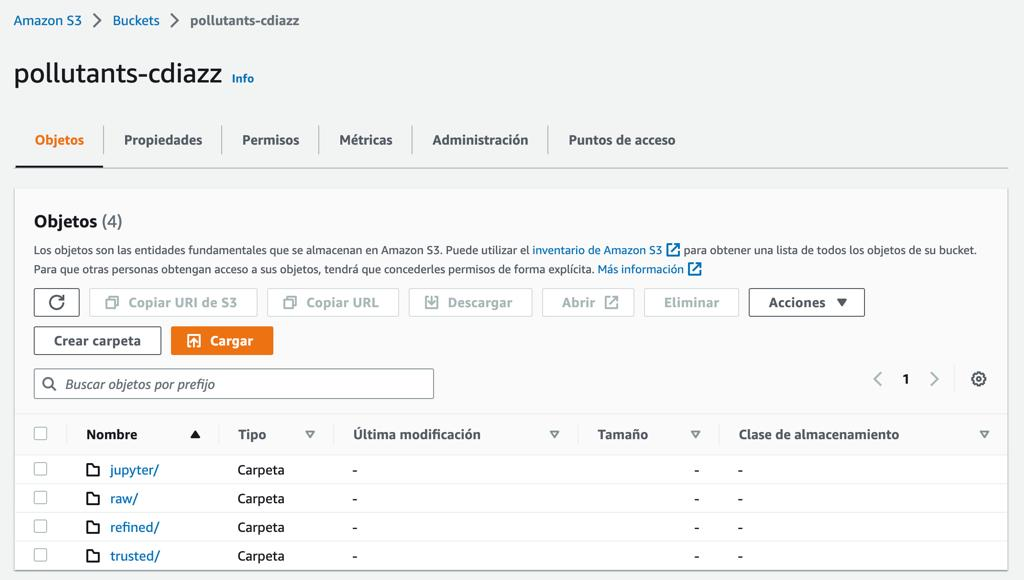

</ul>


<br>

---

## **ETL**

<div align="justify">

<p>
</p>
</div>

### **AWS Glue** - Crawler

<div align="justify">

<p style="margin-left: 25%;">
<strong>AWS Glue</strong> es usado como catalogardor de los datos que están en la zona raw. Éste servicio crea el esquema para posteriormente poder hacer uso de los datos tanto para ETL como para consultas desde Redshift y Athena. 

En concreto, el establecimiento del crawler se hizo siguiendo los parámentros sugeridos por la documentación de AWS para hacer propiamente ETL por medio de <strong>AWS Glue Studio</strong> o <strong>AWS EMR</strong>.

A continuación se dará cuenta de los procesos de catalogación.
</p>
</div>

<br>

<ul>

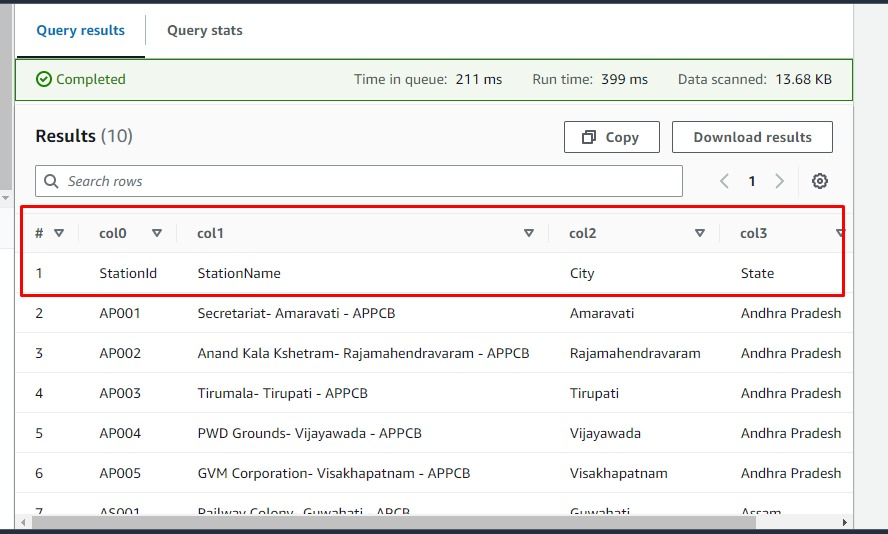

</ul>

<br>

<ul>

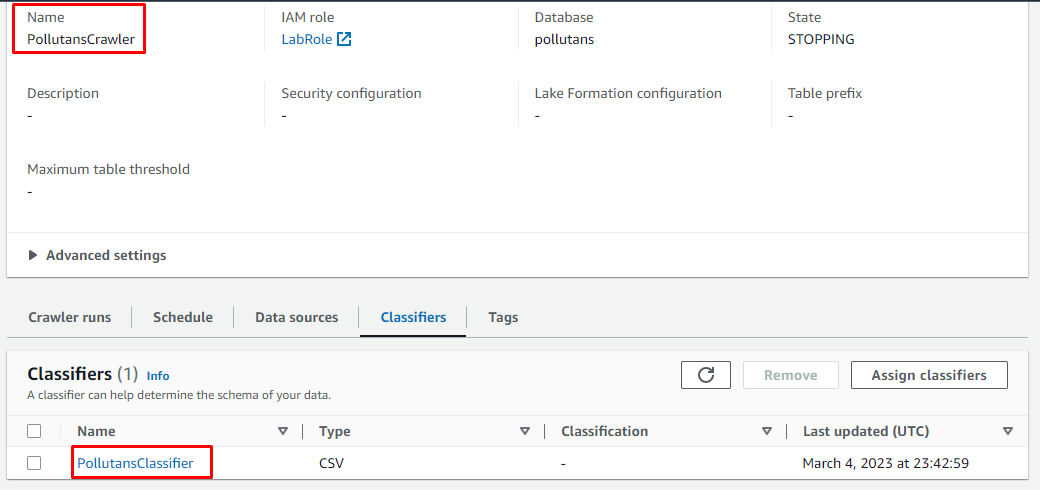

</ul>

<br>

<ul>

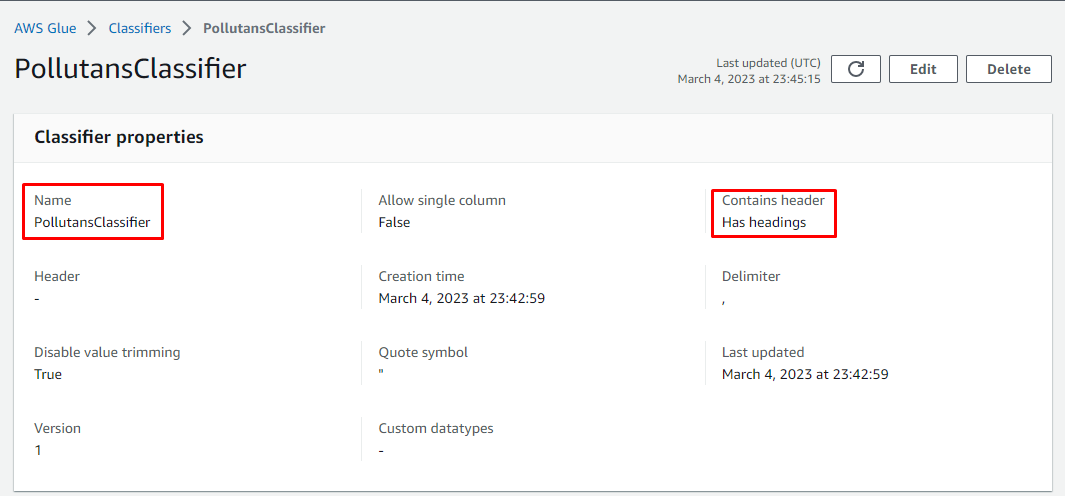

</ul>

<br>

<ul>

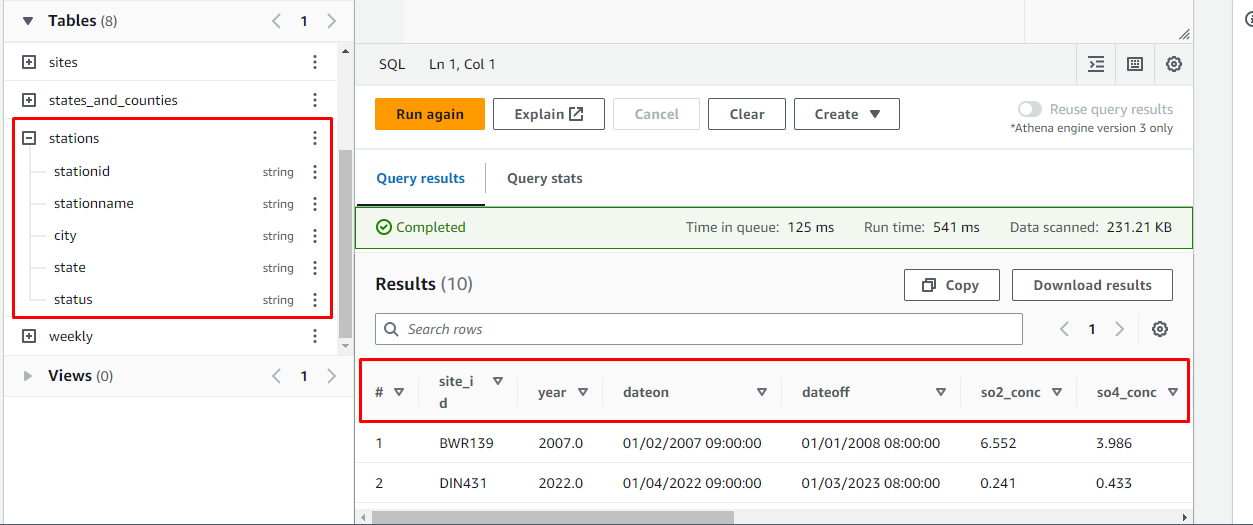

</ul>

<br>

### **AWS Glue Studio** 

<div align="justify">

En <strong>Glue Studio</strong> se creó un <i>job</i> de ETL para hacer un join entre los catalogos de <i>sites</i> y <i>sites_and_counties</i>. A su vez, se eliminan filas innecesarias y se finaliza con un <i>join</i> a la tabla <i>annual</i>. A continuación se encuentra el código (output) formado por <strong>Glue Studio</strong>. 

<br>

<ul>

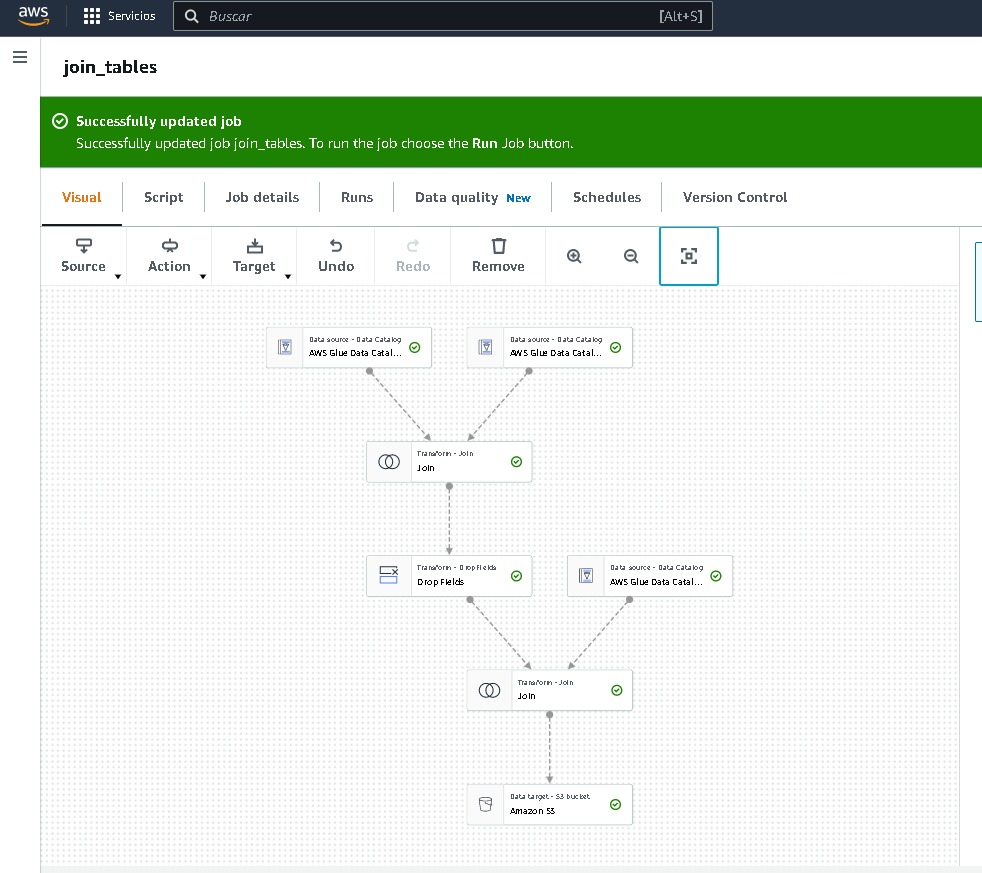

</ul>

<br>




#### Código **Glue Studio**

<ul>

```
import sys
from awsglue.transforms import *
from awsglue.utils import getResolvedOptions
from pyspark.context import SparkContext
from awsglue.context import GlueContext
from awsglue.job import Job

args = getResolvedOptions(sys.argv, ["JOB_NAME"])
sc = SparkContext()
glueContext = GlueContext(sc)
spark = glueContext.spark_session
job = Job(glueContext)
job.init(args["JOB_NAME"], args)

# Script generated for node AWS Glue Data Catalog
AWSGlueDataCatalog_node1678137318728 = glueContext.create_dynamic_frame.from_catalog(
    database="pollutans-db",
    table_name="annual",
    transformation_ctx="AWSGlueDataCatalog_node1678137318728",
)

# Script generated for node AWS Glue Data Catalog
AWSGlueDataCatalog_node1678136885749 = glueContext.create_dynamic_frame.from_catalog(
    database="pollutans-db",
    table_name="states_and_counties",
    transformation_ctx="AWSGlueDataCatalog_node1678136885749",
)

# Script generated for node AWS Glue Data Catalog
AWSGlueDataCatalog_node1678136837171 = glueContext.create_dynamic_frame.from_catalog(
    database="pollutans-db",
    table_name="sites",
    transformation_ctx="AWSGlueDataCatalog_node1678136837171",
)

# Script generated for node Join
Join_node1678136899681 = Join.apply(
    frame1=AWSGlueDataCatalog_node1678136885749,
    frame2=AWSGlueDataCatalog_node1678136837171,
    keys1=["state abbreviation"],
    keys2=["state"],
    transformation_ctx="Join_node1678136899681",
)

# Script generated for node Drop Fields
DropFields_node1678137175633 = DropFields.apply(
    frame=Join_node1678136899681,
    paths=[
        "state code",
        "county code",
        "epa region",
        "site_num",
        "active",
        "inactive",
        "agency",
        "state",
        "county",
        "time_zone",
        "latitude",
        "longitude",
        "elevation",
        "mapid",
        "land_use",
        "terrain",
        "mlm",
        "nadp_id",
        "nadp_distance",
        "update_date",
    ],
    transformation_ctx="DropFields_node1678137175633",
)

# Script generated for node Join
Join_node1678137281291 = Join.apply(
    frame1=DropFields_node1678137175633,
    frame2=AWSGlueDataCatalog_node1678137318728,
    keys1=["site_id"],
    keys2=["site_id"],
    transformation_ctx="Join_node1678137281291",
)

# Script generated for node Amazon S3
AmazonS3_node1678137410242 = glueContext.write_dynamic_frame.from_options(
    frame=Join_node1678137281291,
    connection_type="s3",
    format="json",
    connection_options={
        "path": "s3://pollutans-dsosorioa/trusted/",
        "partitionKeys": ["state name", "site_name"],
    },
    transformation_ctx="AmazonS3_node1678137410242",
)

job.commit()

```
</ul>

<br>

---

### **AWS EMR - Apache Spark** 

<div align="justify">

A través del servicio de <strong>AWS EMR</strong> se realizó el proceso de ETL necesario para, luego de haber catalogado los data sets, depurar y transformar los datos. Principalmente, y como se verá en el script, se nombraron algunas columnas y se hicieron diferentes <i>joins</i> entre diferentes tablas. 

<p>
Para los data sets de <i>USA</i>, se hizo el renombramiento de las columnas para posteriormente poder hacer un <i>join</i>. Los detalles se muestran a continuación. Los resultados fueron guardados desde Spark a <i>s3://pollutants-cdiazz/trusted/usa_trusted</i>.
</p>

<ul type= "circle">
  <li> <a href = "https://drive.google.com/file/d/1cxxJylrai97JIeL5vNqBQV39KKYsKeoK/view?usp=share_link"><strong>Spark html for USA</strong></a>

</ul>


<p>
Para los data sets de <i>India</i>, se hizo el renombramiento de las columnas, se eliminaron las columnas denominadas "AQI","AQI_Bucket", y "Status" para posteriormente poder hacer un <i>join</i>. Los detalles son similares a los del script para USA. Los resultados fueron guardados en <i>s3://pollutants-cdiazz/trusted/india_trusted</i>.
</p>

</div>

<br>

---

## **Consultas (Queries)**

<div align="justify">

<p>
Una vez hechas las transformaciones por medio de los servicios de <strong>AWS Glue</strong> y <strong>AWS EMR</strong>, y luego de haber cargado los nuevos data sets a la zona <i>trusted</i>, se procede a hacer diferentes consultas o <i>queries</i>. Los servicios utilizados para esto fueron principalmente tres: <strong>AWS Athena</strong>, <strong>AWS Redshift</strong> y <strong>AWS EMR - Apache Hive</strong>. 
</p>

<p>
A pesar de que las consultas se pudieron hacer a través de los servicios citados, se debe reconocer que su alcance es diferente. Las consultas en Athena cumplen el propósito de ser rápidas y de no almacenarse dentro del entorno del servicio. Con Redshift en cambio se pueden hacer consultas y almacenarlas, pero también procesos propiamente de ETL. Esto es importante considerarlo ya que con Redshift se crearon las tablas nativas. 
</p>
</div>

### **AWS Athena** 

<div align="justify">

<p>
En <strong>AWS Athena</strong> se realizaron tres consultas. 
</p>

<ul type= "circle">
  <li> <strong>Querie</strong>: Conocer el estado, el condado y la ubicación de un medidor de calidad del aire a partir de un <i>site_id</i> específico de la tabla <i>USA</i>.



```
SELECT state, county, site_name, site_id
FROM sites
WHERE site_id = 'ANL146';
```

<br>

<ul>

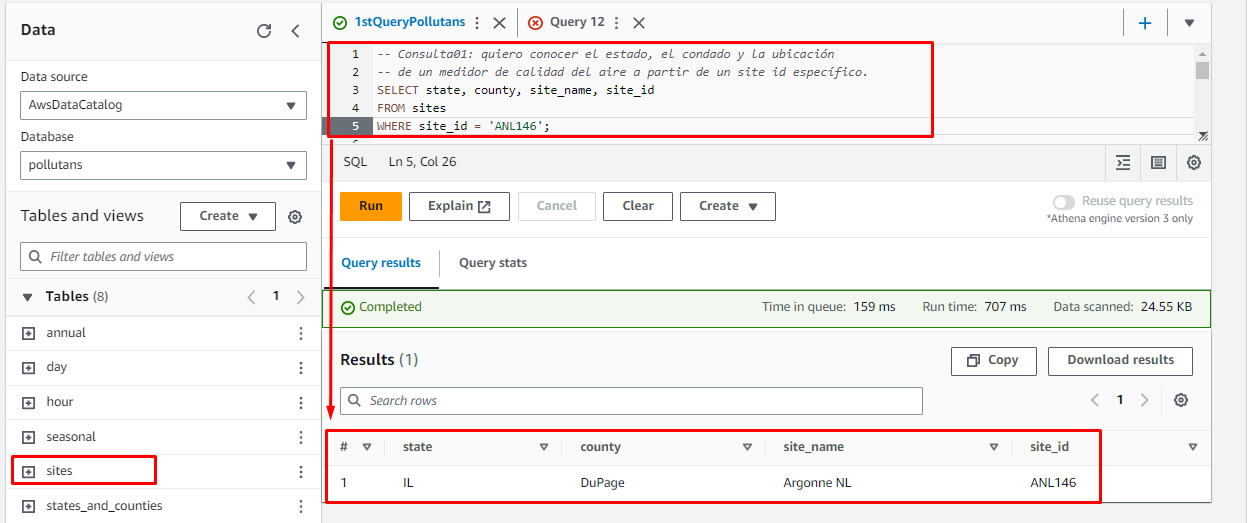

</ul>

<br>


  <li><strong>Querie</strong>: Resumir por año el promedio y acumulado del contaminante NO3 desde la tabla de concentración anual de contaminantes, redondeando las cantidades a máximo 2 decimales.

```
SELECT year,
  round(sum("no3_conc"), 2) accum,
  round(avg("no3_conc"), 2) average
FROM annual
GROUP BY year;
```

  <li><strong>Querie</strong>: Explorar la cantidad de puntos de medición por estado desde la tabla <i>sites</i>.
  
```
SELECT state, COUNT (DISTINCT site_id) ptos_med
FROM sites
GROUP BY state
```
<br>

<ul>

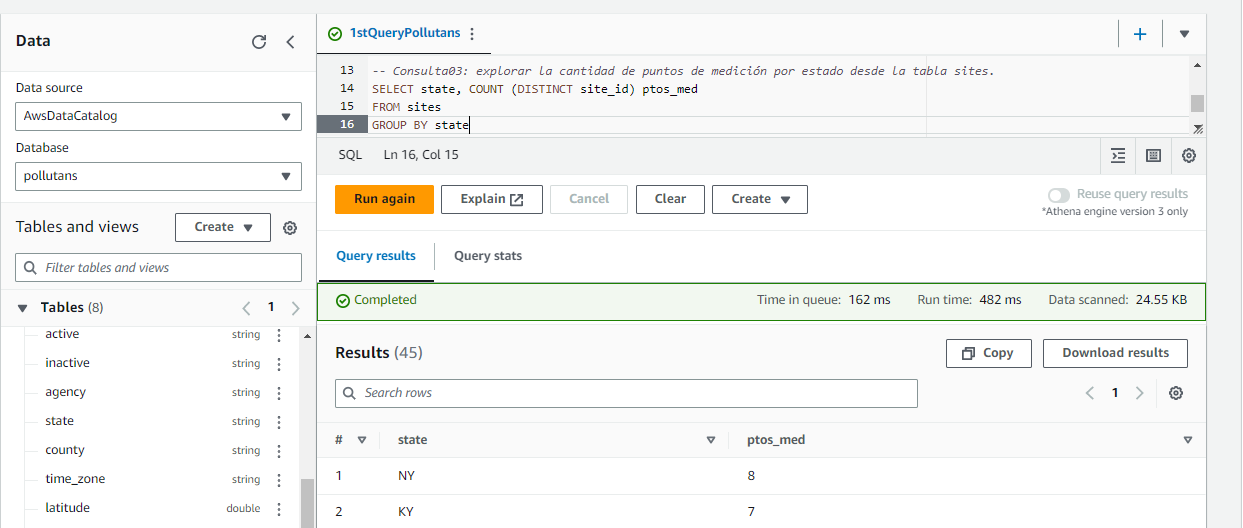

</ul>

<br>

<ul>

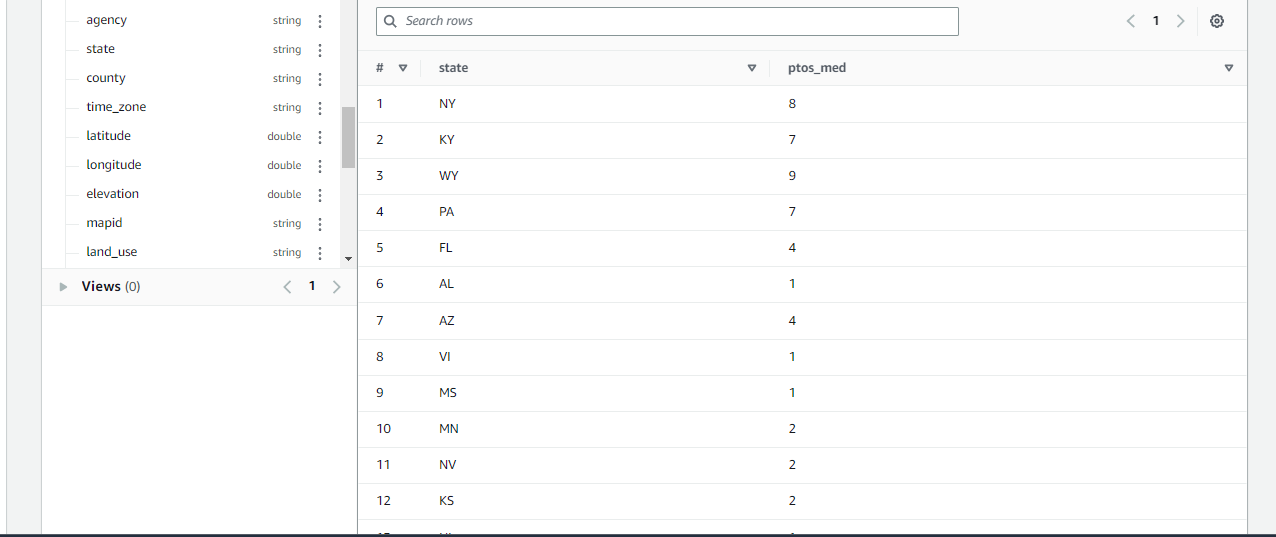

</ul>

<br>

</ul>
</div>

### **AWS RedShift** 

<div align="justify">

<p>
Desde Redshift se realiza un schema-on-write para crear tablas nativas. Luego de esto se hace la migración de los data sets que se encuentran en <strong>S3</strong> para ejecutar las consultas.
</p>


<p>
En <strong>AWS Redshift</strong> se realizaron consultas a los data sets de <i>USA</i> que se encontraban en la zona trusted, y el almacenamiento fue dirigido concretamente a la zona refined (<i>s3://pollutants-cdiazz/refined/promedio</i>). El código empleado para el almacenamiento es el siguiente:
</p>


<ul>

```
UNLOAD ('SELECT state_name,
  AVG(so2_conc) AS avg_so2_conc,
  AVG(so4_conc) AS avg_so4_conc,
  AVG(no3_conc) AS avg_no3_conc,
  AVG(hno3_conc) AS avg_hno3_conc,
  AVG(tno3_conc) AS avg_tno3_conc,
  AVG(nh4_conc) AS avg_nh4_conc,
  AVG(ca_conc) AS avg_ca_conc,
FROM "dev"."public"."usa"
GROUP BY state_name
ORDER BY state_name')
TO 's3://pollutants-cdiazz/refined/promedio'
IAM_ROLE 'arn:aws:iam::628333310232:role/LabRole'
CSV;
```

</ul>

<p>
Las consultas que se hicieron en <strong>AWS Redshift</strong> dan cuenta de los promedios de todos los gases de efecto invernadero en todos los estados de <i>USA</i>. A partir de lo anterior, se da cuenta de un outlier que llamó la atención: la medida de <i>so2_conc</i> en el estado de Hawaii.
</p>

<ul>


```
--Promedio de los años del 2000-2022 por estado en USA

SELECT state_name,
    AVG(so2_conc) AS avg_so2_conc,
    AVG(so4_conc) AS avg_so4_conc,
    AVG(no3_conc) AS avg_no3_conc,
    AVG(hno3_conc) AS avg_hno3_conc,
    AVG(tno3_conc) AS avg_tno3_conc,
    AVG(nh4_conc) AS avg_nh4_conc,
    AVG(ca_conc) AS avg_ca_conc
FROM "dev"."public"."usa"
GROUP BY state_name
ORDER BY state_name
```

</ul>


<ul>

```
--Consulta de cuáles fueron los años 
SELECT year, state_name, so2_conc
FROM "dev"."public"."usa" 
WHERE state_name = 'Hawaii'
GROUP BY year, state_name,so2_conc
ORDER BY year;
```

</ul>

<ul>

```
--Comparación de Hawaii 2003 con otros estados
SELECT * FROM "dev"."public"."usa"
WHERE year = 2003
ORDER BY state_name;
```

</ul>

</div>

<br>

<ul>

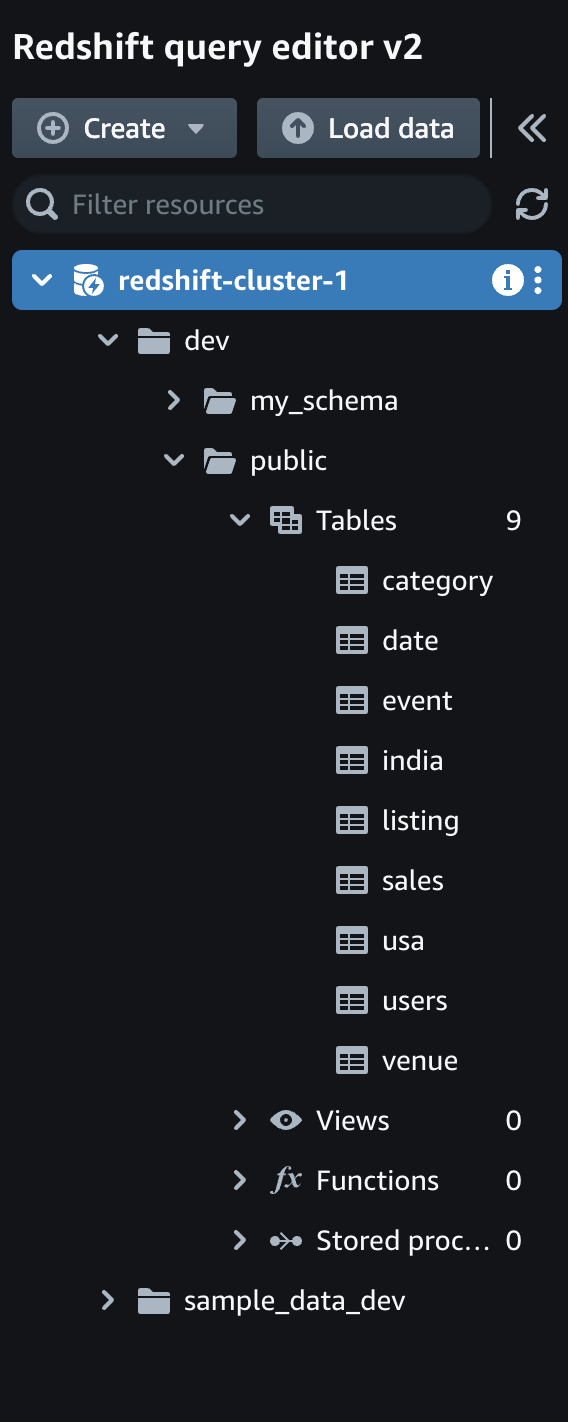

</ul>

---

### **AWS EMR - Apache Hive** 

<div align="justify">

<p>
Desde Apache Hive se hicieron varias consultas. Se da cuenta de dos:
</p>

<ul type= "circle">
  <li> <strong>Querie</strong>: Conocer el promedio de <i>`no`</i> por año en una de las tablas dispuestas en la zona trusted de <i>India</i>.



```
SELECT extract(year FROM `date`) as year, ROUND(AVG(no),2) PromNo
FROM `pollutants-db-trusted`.india_trusted
GROUP BY extract(year FROM `date`)
```

<br>

<ul>

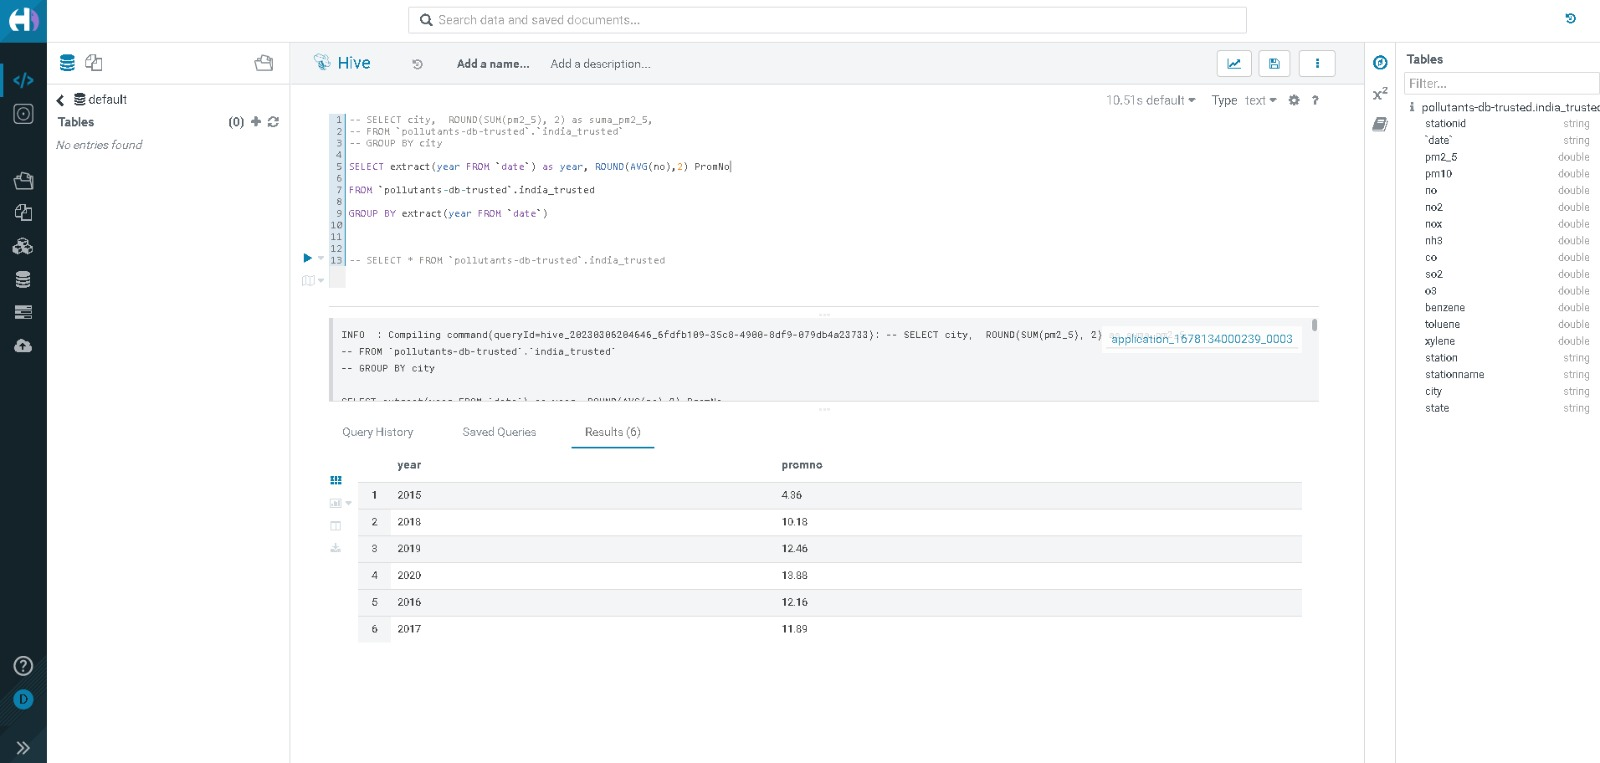

</ul>

<br>

  <li><strong>Querie</strong>: Agrupar por ciudad y sumar el <i>`pm2_5`</i> por cada ciudad.

```
SELECT city,  ROUND(SUM(pm2_5), 2) as suma_pm2_5, 
FROM `pollutants-db-trusted`.`india_trusted`
GROUP BY city

```

<br>

<ul>

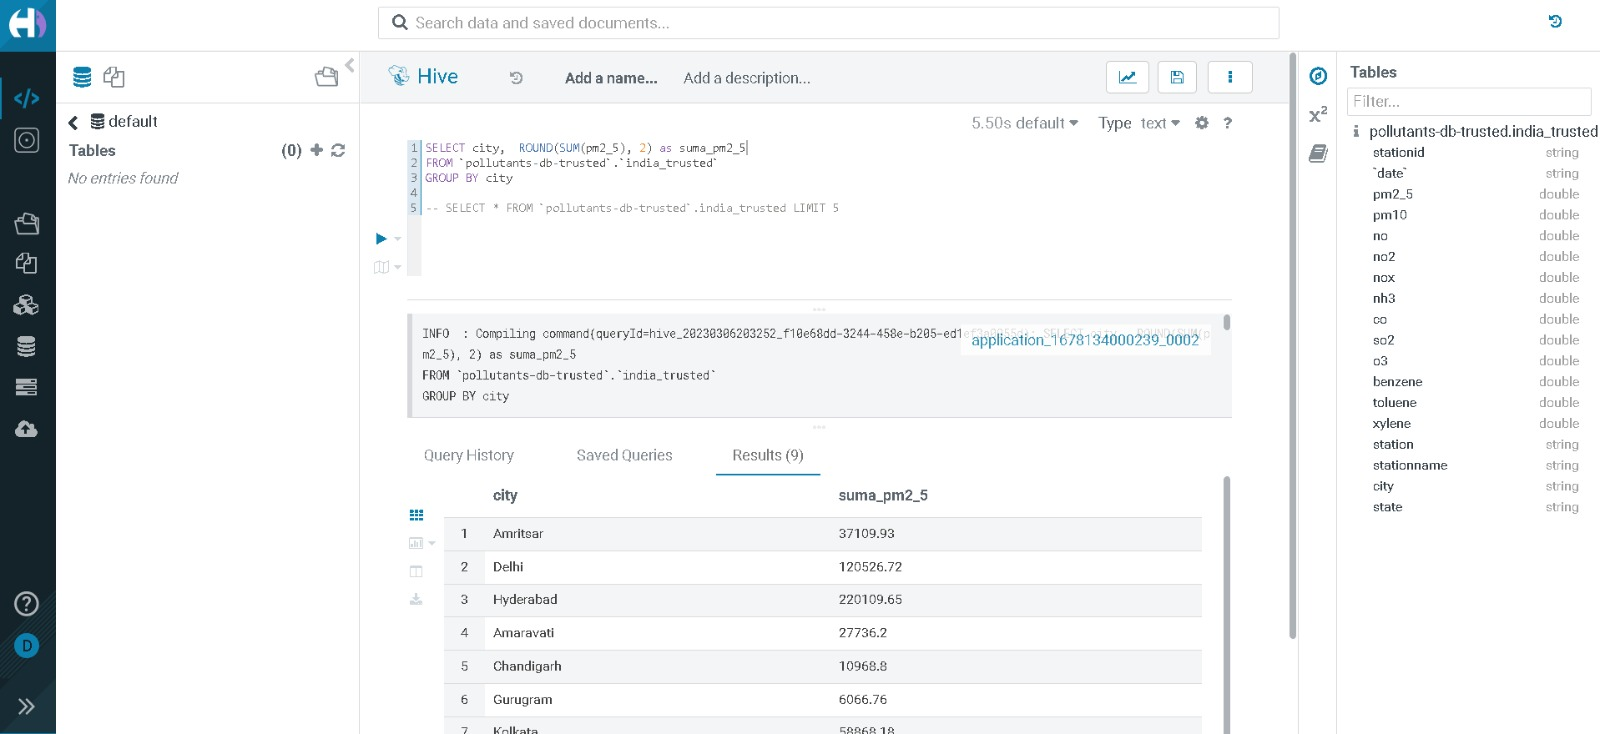

</ul>

<br>

</ul>
</div>